### Classification
Classification is another supervised learning task where an algorithm learns a function to map an input to an output class.

In this activity we will become familiar with several techniques for predicting categorical outcomes. Such models are also called classifiers (they classify an input as one of the outcome groups).

### Breast Cancer Dataset
This is one of the classic datasets used for classification. It contains actual values about tumor characteristics and the diagnosis of the tumor as benign or malignant.

Two version of this dataset can be found at 
*   https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 
*   https://archive.ics.uci.edu/ml/support/Breast+Cancer


In [ ]:
#loading the breast cancer dataset from sklearn dataset library
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) #load the dataset as a dataframe
df_y = pd.DataFrame(data.target, columns=['Malignant']) # in original dataset Benign=1, Malignant=0 
#I will name the target column "Malignant" and will recode the variable (Malignant=1, Benign=0) correspondingly
df=pd.concat([df,1-df_y],axis=1)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
#212 observations are Malignant tumors, 357 are benign
df['Malignant'].sum()

212

In [ ]:
#let's take a look at the summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Malignant
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#to save the loaded file as csv, uncomment next line and run this cell
df.to_csv('breastcancer.csv')

In [ ]:
#check variables for NULL or NA values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Malignant                  0
dtype: int64

In [ ]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Malignant                  0
dtype: int64

<AxesSubplot:>

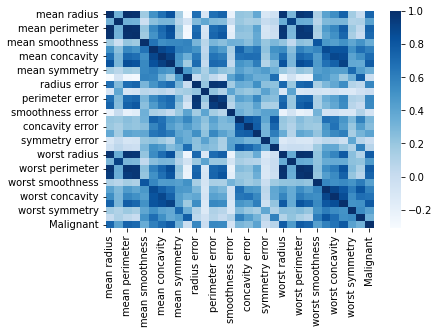

In [ ]:
#visually explore the data: correlation matrix of the dataset
import seaborn as sb
cormatrix=df.corr()
sb.heatmap(cormatrix,cmap='Blues') 
#cmap(colormap) options: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

In [ ]:
##preparing the data for model training
#Outcome variable y: binary (Malignant=1, Benign=0)
y = df[['Malignant']]  
X = df.drop('Malignant',axis=1) #all other variables used as potential predictors

None of the potential predictor/input/X variables are categorical, so no need to encode them (i.e., dummy or OneHot encoding). 

In [ ]:
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head(5)

,Malignant
0,1
1,1
2,1
3,1
4,1


## Splitting the data into Train/Test set
The dataset is split into train and test set, try several classifications models, and evaluate their predicitve performance:

In [ ]:
#splitting the dataset into training (75%) and testing (25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#uncomment ONLY one the following two, depending on how you want to scale the data
sc = StandardScaler() #standardization
#sc = MinMaxScaler() #minmax scaling
X_train_sc=sc.fit_transform(X_train)

<AxesSubplot:ylabel='Density'>

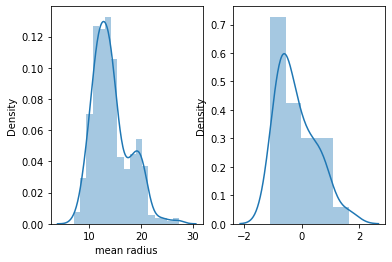

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#compare the histograms of pre/post scaling for one variable ("mean radius") in our training data (X_train)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sb.distplot(X_train[X_train.columns[0]], ax=axs[0])
sb.distplot(X_train_sc[[0]], ax=axs[1])


<AxesSubplot:ylabel='Density'>

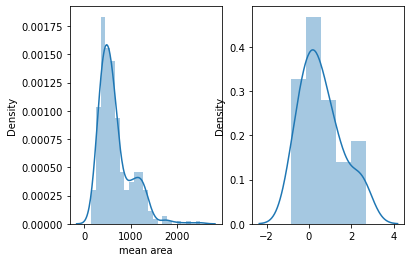

In [ ]:
fig, axs = plt.subplots(ncols=2)
sb.distplot(X_train[X_train.columns[3]], ax=axs[0])
sb.distplot(X_train_sc[[3]], ax=axs[1])

Now rescale X_train using the **minmax** scaler and rerun the plots in the previous cell for some variable (e.g., pick one column from 0 to 29). 

#### Question 1

Can you explain what happened after using a different scaler?

Answer:
With the standard scaler , the range was mean 0 and standard deviation of 1.

With the MinMax scaler, the mean radius range changed(Min = 0, Max=1) 

### Logistic Regression

In [ ]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression(random_state = 0, solver='liblinear')
logistic1.fit(X_train_sc, y_train) #fitting the model

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#using the trained model to predict outcome values for the test data (X_test)
y_pred = logistic1.predict(sc.transform(X_test))

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

### Question 2
What is the problem in the previous step? Did we miss anything?

Answer:

The raw/untransformed dataset was used to predict outcome although the fitting we did was on the transformed dataset. The prediction has to be done with the transformed dataset rather.

In [ ]:
#fix issue before proceeding!!

### Model Evaluation
I used scikitplot (which runs on top of sklearn) to create more appealing display for evaluation metrics such as the confusion matrix and various model evaluation plots.

In [ ]:
#evaluating model performance using sklearn metrics
#see https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  for definition/overview of each metric
import sklearn.metrics as metrics
metrics.confusion_matrix(y_test, y_pred) #confusion matrix

array([[89,  0],
       [ 1, 53]], dtype=int64)

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

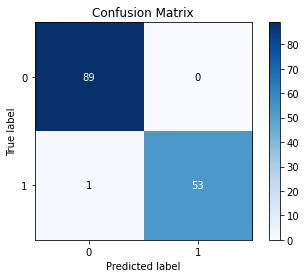

In [ ]:
#run the !pip line once to install library
!pip install scikit-plot 
#using scikit plot for model evaluation
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #confusion matrix

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

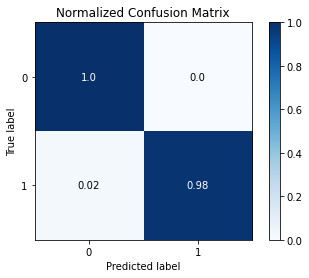

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True) #normalized confusion matrix

In [ ]:
#Let's take a look at model's Precision, Recall, and Accuracy
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred), #Accuracy
metrics.balanced_accuracy_score(y_test, y_pred)) #Balanced Accuracy

(1.0, 0.9814814814814815, 0.993006993006993, 0.9907407407407407)

In [ ]:
#calculate probabilty of each observation in X-test to belong to either outcome class; Benign=0 , Malignant=1
y_pred_prob=logistic1.predict_proba(sc.fit_transform(X_test))
y_pred_prob.round(3)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.969, 0.031],
       [0.991, 0.009],
       [0.998, 0.002],
       [0.977, 0.023],
       [0.77 , 0.23 ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [0.901, 0.099],
       [1.   , 0.   ],
       [0.995, 0.005],
       [0.988, 0.012],
       [0.992, 0.008],
       [0.   , 1.   ],
       [0.045, 0.955],
       [0.983, 0.017],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.001, 0.999],
       [0.999, 0.001],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.058, 0.942],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.004, 0.996],
       [1.   , 0.   ],
       [0.923, 0.077],
       [0.999, 0.001],
       [0.987, 0.013],
       [0.   , 1.   ],
       [0.02 , 0.98 ],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0.8

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

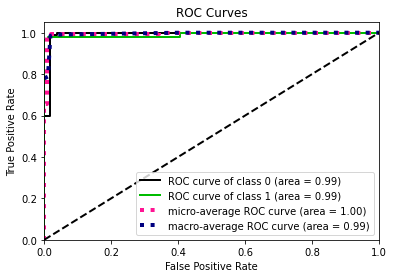

In [ ]:
#plotting the ROC curve to evalute the model's aggregate performance
skplt.metrics.plot_roc_curve(y_test,y_pred_prob)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

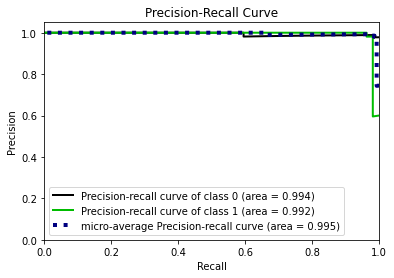

In [ ]:
#plot precision-recall curve
skplt.metrics.plot_precision_recall_curve(y_test,y_pred_prob)

### Decision Tree Classification 

In [ ]:
#using the Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
DecTree1 = DecisionTreeClassifier(criterion = 'gini', random_state = 123) #change metric to 'gini' and rerun
DecTree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

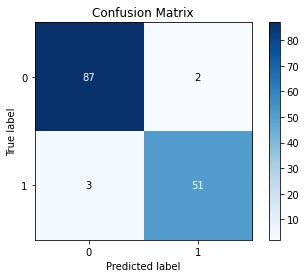

In [ ]:
#using the model to predict outcomes for X_test
y_pred = DecTree1.predict(X_test) 
#confusion matrix for the DecTree Classifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred)


In [ ]:
#calculating other model evalution metrics
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred),#Accuracy
metrics.accuracy_score(y_test, y_pred,normalize=True)) # Balanced Accuracy

(0.9622641509433962, 0.9444444444444444, 0.965034965034965, 0.965034965034965)

Change the split criterion for the Decision Tree to 'gini' and rerun the model and evalution. 
### Question 3
Does it improve the model? which metric did you consider for your answer?

Answer:

There are slight difference betwenn the two depending on what metric under the watch. Precision reduced from 98% to 96%, Accuracy reduced from 97% to 96%, Balance accuracy reduced from 97% to 96%. But Recall remained at 94%. This is because the precision for one class is higher than the other. There is improvement in Accuracy because it involves both classes.

## Cross validation 
Is an approach to evalute machine learning models. CV helps with **overfitting** in supervised learning. It is also use to for model selection (selecting the best performing model between several candidates).

https://scikit-learn.org/stable/modules/cross_validation.html 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier(n_neighbors=5)
KNN1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=KNN1.predict(X_test)
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred))

(0.9803921568627451, 0.9259259259259259, 0.965034965034965)

### Comparing several models (using CV for model validation)
Now we will put everything together and compare several models based on several performance metrics. We use k-fold cross-validation to evaluate each model. 

LogisticReg: 0.952412 (0.035605)
K-NN      : 0.933114 (0.036973)
DecisTree: 0.941886 (0.029896)
NaiveBayes: 0.940132 (0.030037)
SVM       : 0.918985 (0.045869)
RandForest: 0.943640 (0.029651)


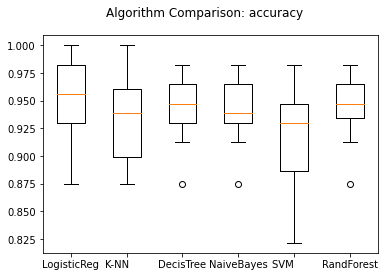

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LogisticReg', LogisticRegression(max_iter=500)))
models.append(('K-NN      ', KNeighborsClassifier()))
models.append(('DecisTree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('SVM       ', SVC())) # add a SVM classifieer
# the next line adds a RandomForest classifier
models.append(('RandForest', RandomForestClassifier(n_estimators = 10,criterion = 'entropy')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' #metric we want to compare
#see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for complete list of options
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: ' +scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

I will be changing the scoring metric in the previous code cell to see which model is best in terms of predicting the MAlignant (1) class using the following:
* scoring='accuracy'
* scoring='precision'
* scoring='recall'

### Observation

#### Precision Results
LogisticReg: 0.949023 (0.043295)
K-NN      : 0.930153 (0.063830)
DecisTree: 0.927601 (0.044704)
NaiveBayes: 0.943907 (0.054713)
SVM       : 0.968958 (0.033266)
RandForest: 0.974908 (0.033248)

#### Recall Results
LogisticReg: 0.920216 (0.072695)
K-NN      : 0.892910 (0.085047)
DecisTree: 0.919343 (0.059255)
NaiveBayes: 0.892156 (0.055979)
SVM       : 0.820662 (0.104524)
RandForest: 0.928991 (0.056286)

#### Accuracy Results
LogisticReg: 0.952412 (0.035605)
K-NN      : 0.933114 (0.036973)
DecisTree: 0.941886 (0.029896)
NaiveBayes: 0.940132 (0.030037)
SVM       : 0.918985 (0.045869)
RandForest: 0.943640 (0.029651)



Random Forest has the best Recall with an average of 92.9%
SVM has the best Precision with an average of 96.8% for the Malignant (1) class.
Random Forest has the best Accuracy with an average of 95.5%

Considering the state of the cancer been Malignant, a model with a low Precision and high Recall will be better. looking at the results set, it can be deduced that Decision Tree is the best model even though the difference between the recall and precision is a quite small. 

## Iris dataset (3 outcome classes)

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
(data.feature_names, 
data.target_names)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

## Interactive Visualization of Decision Tree Classifers

In [ ]:
!pip install ipywidgets

In [1]:
#conda install graphviz
!pip install graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

# load dataset
data = load_breast_cancer() #load_breast cancer data
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0, criterion = crit, 
                                     splitter = split, max_depth = depth,
                                     min_samples_split=min_split, 
                                     min_samples_leaf=min_leaf)
  estimator.fit(X, y)
  graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                      feature_names=labels, 
                                      class_names=['0', '1', '2'], filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator

inter=interactive(plot_tree, 
                  crit = ["gini", "entropy"] , 
                  split = ["best", "random"] , 
                  depth=[1,2,3,4], 
                  min_split=(0.1,1), #min number of samples to further split a node
                  min_leaf=(0.1,0.5)) #min number of samples required to be a leaf node
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = load_iris() #load_iris()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0, criterion = crit, 
                                     splitter = split, max_depth = depth,
                                     min_samples_split=min_split, 
                                     min_samples_leaf=min_leaf)
  estimator.fit(X, y)
  graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                      feature_names=labels, 
                                      class_names=['0', '1', '2'], filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator

inter=interactive(plot_tree, 
                  crit = ["gini", "entropy"] , 
                  split = ["best", "random"] , 
                  depth=[1,2,3,4], 
                  min_split=(0.1,1), #min number of samples to further split a node
                  min_leaf=(0.1,0.5)) #min number of samples required to be a leaf node
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Outcome classes for visualized Decision Tree (Breast Cancer dataset)
*   Benign=1
*   Malignant=0


## Most Important factor for classifying tumor
The question is, what is most important variable to consider when classifying tumors according to the Decision Tree we have built?

According to the Decision Tree built, the most important variable is 'worst perimeter' when classifying tumors.

Outcome classes for visualized Decision Tree (Iris dataset)
*   Iris Setosa = 0
*   Iris Versicolour = 1
*   Iris Virginica = 2


What is the most important variable to consider when classifying Iris plants?

"Petal width" is the most important variable to consider when classifying Iris plant.